In [2]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from MorgateCalculator import *

#### Mortage calculator

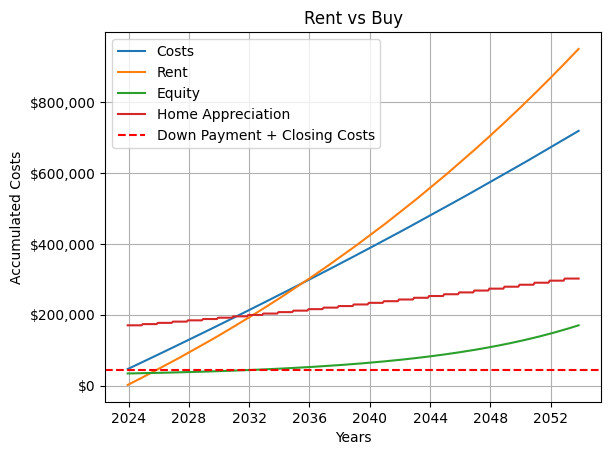

In [3]:
zillow_home_price = 170000
appreciation_rate = 2
property_tax_rate = 2.26
closing_cost_rate = 8 # average closing costs 
down_payment_percent = 20.0
interest_rate = 9.5
rent_inflation_rate = 2.51
rent_per_month = 1800
years = 30

df = evaluate_home(zillow_home_price, appreciation_rate, property_tax_rate, closing_cost_rate, down_payment_percent, interest_rate, rent_per_month, rent_inflation_rate, years)
plot_costs_equity(df, zillow_home_price, down_payment_percent, closing_cost_rate)

In [4]:
df

,total_monthly_payments,monthly_total_principal,monthly_total_interests,monthly_total_payments,monthly_maintenance_cost,monthly_property_tax,monthly_home_insurance,equity,accumulated_costs,rent_per_month,accumulated_rent,proyected_home_appreciation,dates
0,1681.824222,66.895055,1076.666667,1143.561722,144.500000,326.570000,67.192500,34066.895055,46561.82,1800.000000,1800.00,170000.000000,2023-12-10 12:36:33.077416
1,1681.824222,67.424641,1076.137081,1143.561722,144.500000,326.570000,67.192500,34134.319696,48243.65,1800.000000,3600.00,170000.000000,2024-01-10 12:36:33.077416
2,1681.824222,67.958419,1075.603302,1143.561722,144.500000,326.570000,67.192500,34202.278115,49925.47,1800.000000,5400.00,170000.000000,2024-02-10 12:36:33.077416
3,1681.824222,68.496424,1075.065298,1143.561722,144.500000,326.570000,67.192500,34270.774539,51607.30,1800.000000,7200.00,170000.000000,2024-03-10 12:36:33.077416
4,1681.824222,69.038687,1074.523035,1143.561722,144.500000,326.570000,67.192500,34339.813226,53289.12,1800.000000,9000.00,170000.000000,2024-04-10 12:36:33.077416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2099.432324,1099.351255,44.210467,1143.561722,256.609558,579.937601,119.323444,165514.871270,710199.80,3693.969261,935035.07,301893.597351,2053-07-10 12:36:33.077416
356,2099.432324,1108.054453,35.507269,1143.561722,256.609558,579.937601,119.323444,166622.925723,712299.23,3693.969261,938729.04,301893.597351,2053-08-10 12:36:33.077416
357,2099.432324,1116.826550,26.735171,1143.561722,256.609558,579.937601,119.323444,167739.752273,714398.66,3693.969261,942423.00,301893.597351,2053-09-10 12:36:33.077416
358,2099.432324,1125.668094,17.893628,1143.561722,256.609558,579.937601,119.323444,168865.420367,716498.10,3693.969261,946116.97,301893.597351,2053-10-10 12:36:33.077416


In [84]:
# read csv file and return a pandas dataframe
def read_csv_file(file_name):
    return pd.read_csv(file_name)

df_history_prices = read_csv_file('Zip_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')




In [126]:
df_average_rent = read_csv_file("Zip_zori_sm_sa_month.csv")
zipcode = 8889

In [127]:


# break_even_month = get_index_equity_greater_than_down_payment(df['equity'], (zillow_home_price * (down_payment_percent / 100)), closing_costs)
# print("Equity will break even after " + str(break_even_month) + " months")

In [128]:

# filter df_history_prices for zip code 18101
# create a function that returns a df containing the average rent for a zip code, the new df should have two columns: date and rent
def get_average_home_price(df, zip_code):
    df_average_home_price = df[df['RegionName'] == zip_code]
    df_average_home_price = df_average_home_price.transpose()
    df_average_home_price = df_average_home_price.drop(df_average_home_price.index[0:9])
    df_average_home_price = df_average_home_price.reset_index()
    df_average_home_price.columns = ['date', 'price']
    df_average_home_price['date'] = pd.to_datetime(df_average_home_price['date'])
    return df_average_home_price

df_filtered_home_price = get_average_home_price(df_history_prices, zipcode)


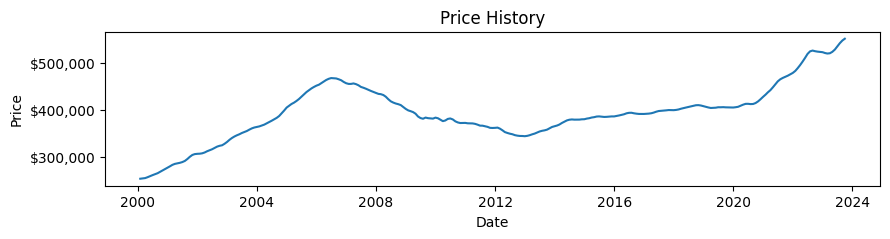

In [129]:
# plot price history
plt.figure(figsize=(10,2))
plt.plot(df_filtered_home_price['date'], df_filtered_home_price['price'])
plt.title('Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.show()


In [130]:

# create a function that returns a df containing the average rent for a zip code, the new df should have two columns: date and rent
def get_average_rent(df, zip_code):
    df_average_rent = df[df['RegionName'] == zip_code]
    df_average_rent = df_average_rent.transpose()
    df_average_rent = df_average_rent.drop(df_average_rent.index[0:9])
    df_average_rent = df_average_rent.reset_index()
    df_average_rent.columns = ['date', 'rent']
    df_average_rent['date'] = pd.to_datetime(df_average_rent['date'])
    return df_average_rent

df_filtered = get_average_rent(df_average_rent, zipcode)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

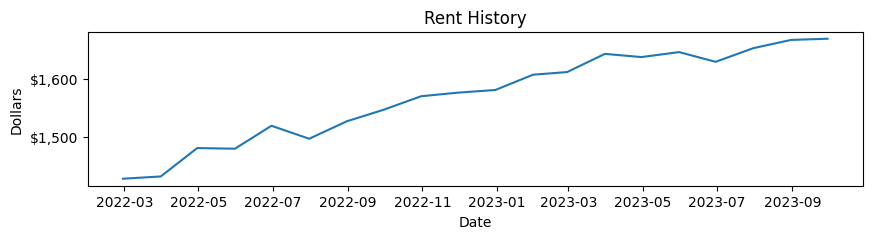

In [121]:
plt.figure(figsize=(10,2))
plt.plot(df_filtered['date'], df_filtered['rent'])
plt.title('Rent History')
plt.xlabel('Date')
plt.ylabel('Dollars')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.show()

In [122]:
# join df_filtered and df_history_prices_18101 by date

df_filtered_home_price = get_average_home_price(df_history_prices, zipcode)
df_filtered = get_average_rent(df_average_rent, zipcode)

df_filtered_home_price = df_filtered_home_price[df_filtered_home_price['price'].notna()]
df_filtered = df_filtered[df_filtered['rent'].notna()]

df_filtered_home_price = df_filtered_home_price.set_index('date')
df_filtered = df_filtered.set_index('date')
df_combined = df_filtered.join(df_filtered_home_price, how='inner')
df_combined = df_combined.reset_index()
df_combined.columns = ['date', 'rent', 'price']
df_combined['rent'] = df_combined['rent'].astype(float)
df_combined['price'] = df_combined['price'].astype(float)

# calculate the ratio of rent to price
df_combined['ratio'] = df_combined['rent'] / df_combined['price']
#df_combined['ratio'] = df_combined['ratio'].round(2)
df_combined['ratio'] = df_combined['ratio'] * 100

df_combined

,date,rent,price,ratio
0,2022-02-28,1427.861890,239527.369218,0.596116
1,2022-03-31,1431.766439,244569.437545,0.585423
2,2022-04-30,1480.592655,249597.876161,0.593191
3,2022-05-31,1479.482821,253852.439507,0.582812
4,2022-06-30,1518.924900,257644.731210,0.589542
5,2022-07-31,1496.619073,260167.890067,0.575251
6,2022-08-31,1526.717170,261028.253143,0.584886
7,2022-09-30,1546.345020,260913.239462,0.592666
8,2022-10-31,1569.743498,260704.829277,0.602115
9,2022-11-30,1575.873812,261086.156622,0.603584


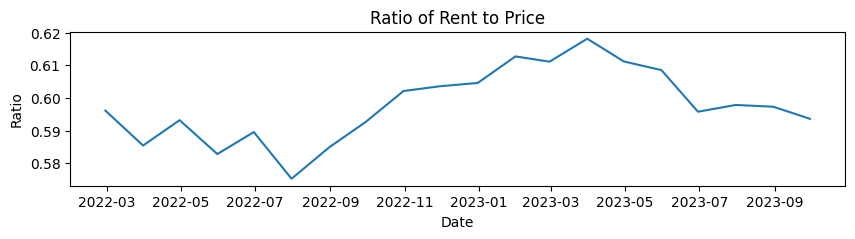

In [123]:
# plot the ratio and date
plt.figure(figsize=(10,2))
plt.plot(df_combined['date'], df_combined['ratio'])
plt.title('Ratio of Rent to Price')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()



In [133]:
df_average_rent[df_average_rent['RegionName'] == zipcode]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
